In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Option 1: Mount Google Drive
# South
# import pandas as pd
# X_train_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_S.xlsx')
# X_test_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_S.xlsx')
# y_train_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_S.xlsx')['Energy']
# y_test_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_S.xlsx')['Energy']

# # East
# X_train_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_E.xlsx')
# X_test_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_E.xlsx')
# y_train_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_E.xlsx')['Energy']
# y_test_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_E.xlsx')['Energy']

# # West
# X_train_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_W.xlsx')
# X_test_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_W.xlsx')
# y_train_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_W.xlsx')['Energy']
# y_test_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_W.xlsx')['Energy']

# Option 2: Downloaded Files
# South
X_train_S = pd.read_excel('X_train_S.xlsx')
X_test_S = pd.read_excel('X_test_S.xlsx')
y_train_S = pd.read_excel('y_train_S.xlsx')['Energy']
y_test_S = pd.read_excel('y_test_S.xlsx')['Energy']

# East
X_train_E = pd.read_excel('X_train_E.xlsx')
X_test_E = pd.read_excel('X_test_E.xlsx')
y_train_E = pd.read_excel('y_train_E.xlsx')['Energy']
y_test_E = pd.read_excel('y_test_E.xlsx')['Energy']

# West
X_train_W = pd.read_excel('X_train_W.xlsx')
X_test_W = pd.read_excel('X_test_W.xlsx')
y_train_W = pd.read_excel('y_train_W.xlsx')['Energy']
y_test_W = pd.read_excel('y_test_W.xlsx')['Energy']

In [3]:
# Shape
# South
print('X_train_S shape', X_train_S.shape)
print('X_test_S shape', X_test_S.shape)
print('y_train_S shape', y_train_S.shape)
print('y_test_S shape', y_test_S.shape)

print()

# East
print('X_train_E shape', X_train_E.shape)
print('X_test_E shape', X_test_E.shape)
print('y_train_E shape', y_train_E.shape)
print('y_test_E shape', y_test_E.shape)

print()

# West
print('X_train_W shape', X_train_W.shape)
print('X_test_W shape', X_test_W.shape)
print('y_train_W shape', y_train_W.shape)
print('y_test_W shape', y_test_W.shape)


X_train_S shape (6132, 5)
X_test_S shape (2628, 5)
y_train_S shape (6132,)
y_test_S shape (2628,)

X_train_E shape (6132, 5)
X_test_E shape (2628, 5)
y_train_E shape (6132,)
y_test_E shape (2628,)

X_train_W shape (6132, 5)
X_test_W shape (2628, 5)
y_train_W shape (6132,)
y_test_W shape (2628,)


# Create and Test Model

In [4]:
import tensorflow as tf
import random
import os

# Used to maintain same random values
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

**South**

In [5]:
# Build LSTM model - South
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create ANN model
model_S = Sequential() # Initialize model
model_S.add(Dense(128, activation='relu', input_shape=(X_train_S.shape[1],))) # Input layer
model_S.add(Dropout(0.2)) # dropout layer for regularization
#model_S.add(Dense(64, activation='relu'))
#model_S.add(Dropout(0.2)) # dropout layer for regularization
model_S.add(Dense(1, activation='linear')) # output layer with linear activation

# Compile model
model_S.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final_S, X_val_S, y_train_final_S, y_val_S = train_test_split(
                                                      X_train_S, y_train_S, test_size=0.1, random_state=42)

In [7]:
# Train model
history_S = model_S.fit(
    X_train_final_S, y_train_final_S,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_S, y_val_S),
    shuffle=False)

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 860.6792 - val_loss: 5.1739
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123.3690 - val_loss: 11.5523
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.8858 - val_loss: 2.3019
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50.9846 - val_loss: 1.2352
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43.1899 - val_loss: 3.7786
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.6458 - val_loss: 1.2242
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.9336 - val_loss: 0.9624
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.7928 - val_loss: 1.0071
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0829 - val_loss: 2.9158
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.6764 - val_loss: 1.1419
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8292 - val_loss: 0.8061
Epoch 12/100
173/173 ━━━━━━

In [8]:
# Check accuracy
from sklearn.metrics import mean_squared_error, r2_score

# Predict with model
y_pred_S = model_S.predict(X_test_S)

# Test accuracy
mse_S = mean_squared_error(y_test_S, y_pred_S)
r2_S = r2_score(y_test_S, y_pred_S)
print('South MSE:', mse_S)
print('South R2:', r2_S)

# Tuning
# Epochs =100, 3 hidden layers
#MSE: 3.017235886740472, R2: 0.9984651098610855
# Epochs =100, 3 hidden layers
#MSE: 1.8746458742800904, R2: 0.9990463538236987
# Epochs =100, 1 hidden layer (1 min)
# MSE: 1.1725911821582398, R2: 0.9994034942211902

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
South MSE: 0.28206336422991585
South R2: 0.9998565122872202


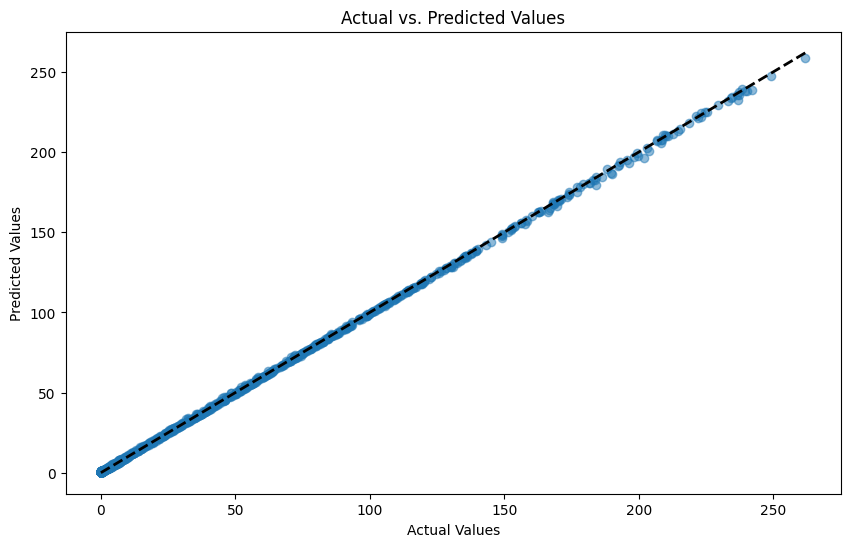

In [9]:
# Visualize random forest model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_S, y_pred_S, alpha=0.5)
plt.plot([y_test_S.min(), y_test_S.max()], [y_test_S.min(), y_test_S.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**East**

In [10]:
# Reshape data
X_train_reshaped_E = X_train_E.values.reshape(X_train_E.shape[0], 1, X_train_E.shape[1])

# Create ANN model
model_E = Sequential()
model_E.add(Dense(128, activation='relu', input_shape=(X_train_E.shape[1],)))
model_E.add(Dropout(0.2)) # dropout layer for regularization
model_E.add(Dense(1, activation='linear')) # output layer with linear activation

# Compile model
model_E.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final_E, X_val_E, y_train_final_E, y_val_E = train_test_split(
                                                      X_train_E, y_train_E, test_size=0.1, random_state=42)

In [12]:
# Train model
history_E = model_E.fit(
    X_train_final_E,
    y_train_final_E.values, # Convert y_train_final_E to a NumPy array
    epochs=100,
    batch_size=32,
    validation_data=(X_val_E, y_val_E.values), # Convert y_val_E to a NumPy array
    shuffle=False)

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 197.8522 - val_loss: 3.8509
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.9039 - val_loss: 2.2269
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56.4880 - val_loss: 4.1530
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 40.7744 - val_loss: 1.7035
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28.3756 - val_loss: 2.9135
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.0513 - val_loss: 1.2962
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.6124 - val_loss: 4.6968
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.2647 - val_loss: 1.2728
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.6660 - val_loss: 1.2094
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.8782 - val_loss: 0.9234
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4490 - val_loss: 1.1599
Epoch 12/100
173/173 ━━━━━━━━

In [13]:
# Check accuracy
from sklearn.metrics import mean_squared_error, r2_score

# Predict with model
y_pred_E = model_E.predict(X_test_E)

# Test accuracy
mse_E = mean_squared_error(y_test_E, y_pred_E)
r2_E = r2_score(y_test_E, y_pred_E)
print('East MSE:', mse_E)
print('East R2:', r2_E)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
East MSE: 1.5031842135099744
East R2: 0.9989944148639649


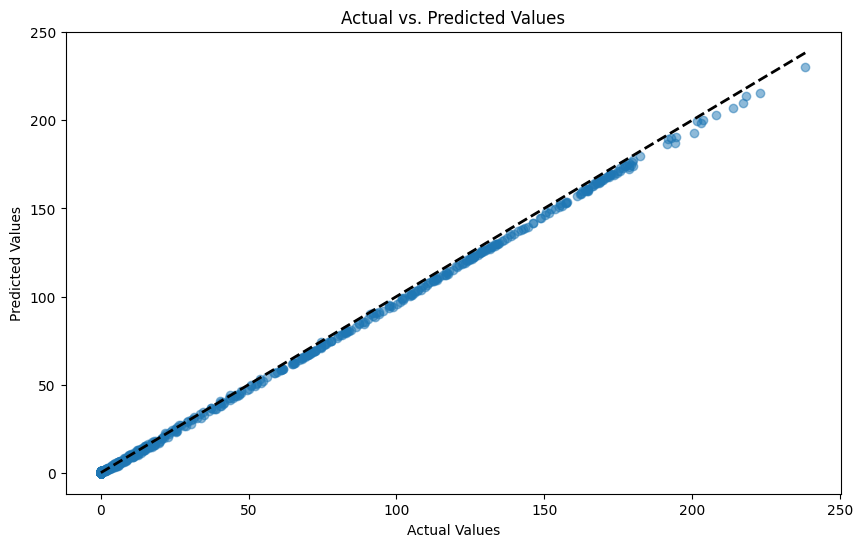

In [14]:
# Visualize random forest model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_E, y_pred_E, alpha=0.5)
plt.plot([y_test_E.min(), y_test_E.max()], [y_test_E.min(), y_test_E.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**West**

In [15]:
# Reshape data
X_train_reshaped_W = X_train_W.values.reshape(X_train_W.shape[0], 1, X_train_W.shape[1])

# Create ANN model
model_W = Sequential()
model_W.add(Dense(128, activation='relu', input_shape=(X_train_W.shape[1],)))
model_W.add(Dropout(0.2)) # dropout layer for regularization
model_W.add(Dense(1, activation='linear')) # output layer with linear activation

# Compile model
model_W.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Split for validation set again
X_train_final_W, X_val_W, y_train_final_W, y_val_W = train_test_split(
                                                      X_train_W, y_train_W, test_size=0.1, random_state=42)

In [17]:
# Train model
history_W = model_W.fit(
    X_train_final_W,
    y_train_final_W.values, # Convert y_train_final_w to a NumPy array
    epochs=100,
    batch_size=32,
    validation_data=(X_val_W, y_val_W.values), # Convert y_val_W to a NumPy array
    shuffle=False)

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 573.7200 - val_loss: 5.1059
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120.2109 - val_loss: 3.6928
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66.8737 - val_loss: 2.4631
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36.1274 - val_loss: 1.4322
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.2570 - val_loss: 7.7267
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.4545 - val_loss: 2.6764
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.6943 - val_loss: 1.1843
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6313 - val_loss: 0.9366
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.1618 - val_loss: 1.3872
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.8985 - val_loss: 2.3187
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.0777 - val_loss: 2.6738
Epoch 12/100
173/173 ━━━━━━━

In [18]:
# Check accuracy
from sklearn.metrics import mean_squared_error, r2_score

# Predict with model
y_pred_W = model_W.predict(X_test_W)

# Test accuracy
mse_W = mean_squared_error(y_test_W, y_pred_W)
r2_W = r2_score(y_test_W, y_pred_W)
print('West MSE:', mse_W)
print('West R2:', r2_W)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
West MSE: 0.27246617928403283
West R2: 0.9997812715597679


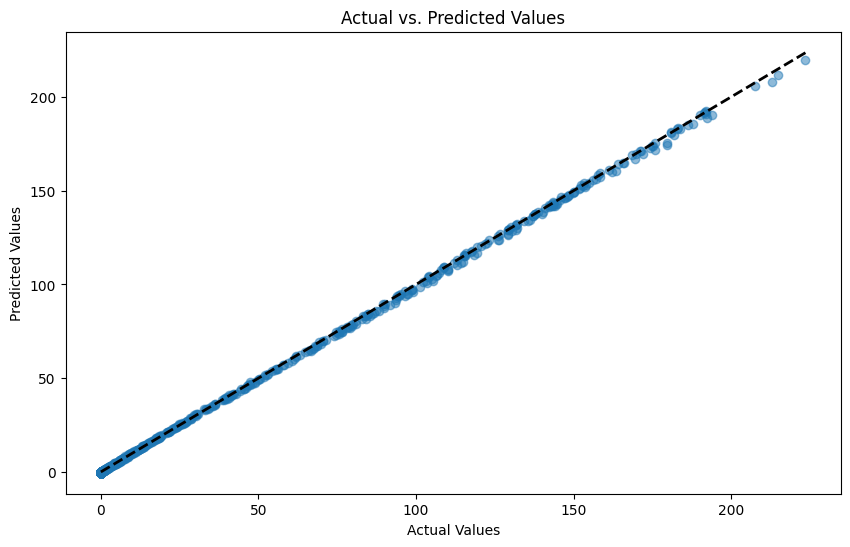

In [19]:
# Visualize random forest model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_W, y_pred_W, alpha=0.5)
plt.plot([y_test_W.min(), y_test_W.max()], [y_test_W.min(), y_test_W.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Predict with 2023 Data

In [20]:
# Import 2023 data
#from google.colab import drive
#drive.mount('/content/drive')

# Option 1: Mount Google Drive
# South
# import pandas as pd
# X_train_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_S_23.xlsx')
# X_test_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_S_23.xlsx')
# y_train_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_S_23.xlsx')
# y_test_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_S_23.xlsx')

# # East
# X_train_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_E_23.xlsx')
# X_test_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_E_23.xlsx')
# y_train_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_E_23.xlsx')['Energy']
# y_test_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_E_23.xlsx')['Energy']

# # West
# X_train_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_W_23.xlsx')
# X_test_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_W_23.xlsx')
# y_train_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_W_23.xlsx')['Energy']
# y_test_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_W_23.xlsx')['Energy']

# Option 2: Downloaded Files
# South
X_train_S_23 = pd.read_excel('X_train_S_23.xlsx')
X_test_S_23 = pd.read_excel('X_test_S_23.xlsx')
y_train_S_23 = pd.read_excel('y_train_S_23.xlsx')['Energy']
y_test_S_23 = pd.read_excel('y_test_S_23.xlsx')['Energy']

# East
X_train_E_23 = pd.read_excel('X_train_E_23.xlsx')
X_test_E_23 = pd.read_excel('X_test_E_23.xlsx')
y_train_E_23 = pd.read_excel('y_train_E_23.xlsx')['Energy']
y_test_E_23 = pd.read_excel('y_test_E_23.xlsx')['Energy']

# West
X_train_W_23 = pd.read_excel('X_train_W_23.xlsx')
X_test_W_23 = pd.read_excel('X_test_W_23.xlsx')
y_train_W_23 = pd.read_excel('y_train_W_23.xlsx')['Energy']
y_test_W_23 = pd.read_excel('y_test_W_23.xlsx')['Energy']

In [21]:
# Shape
# South
print('X_train_S_23 shape:', X_train_S_23.shape)
print('X_test_S_23 shape:', X_test_S_23.shape)
print('y_train_S_23 shape:', y_train_S_23.shape)
print('y_test_S_23 shape:', y_test_S_23.shape)

print()

# East
print('X_train_E_23 shape:', X_train_E_23.shape)
print('X_test_E_23 shape:', X_test_E_23.shape)
print('y_train_E_23 shape:', y_train_E_23.shape)
print('y_test_E_23 shape:', y_test_E_23.shape)

print()

# West
print('X_train_W_23 shape:', X_train_W_23.shape)
print('X_test_W_23 shape:', X_test_W_23.shape)
print('y_train_W_23 shape:', y_train_W_23.shape)
print('y_test_W_23 shape:', y_test_W_23.shape)

X_train_S_23 shape: (6132, 5)
X_test_S_23 shape: (2628, 5)
y_train_S_23 shape: (6132,)
y_test_S_23 shape: (2628,)

X_train_E_23 shape: (6132, 5)
X_test_E_23 shape: (2628, 5)
y_train_E_23 shape: (6132,)
y_test_E_23 shape: (2628,)

X_train_W_23 shape: (6132, 5)
X_test_W_23 shape: (2628, 5)
y_train_W_23 shape: (6132,)
y_test_W_23 shape: (2628,)


In [22]:
# Rename columns
X_test_S_23 = X_test_S_23.rename(columns={'poa_direct_eff': 'poa_direct'})
X_test_E_23 = X_test_E_23.rename(columns={'poa_direct_eff': 'poa_direct'})
X_test_W_23 = X_test_W_23.rename(columns={'poa_direct_eff': 'poa_direct'})

In [23]:
# Predict with 2023 data
# South
y_pred_S_23 = model_S.predict(X_test_S_23)  # Use X_test_S_23 for prediction
mse_test_S_23 = mean_squared_error(y_test_S_23, y_pred_S_23)  # Use y_test_S_23 for evaluation
r2_test_S_23 = r2_score(y_test_S_23, y_pred_S_23)
print('Test MSE South 2023:', mse_test_S_23)
print('Test R^2 South 2023:', r2_test_S_23)

print()
# East
y_pred_E_23 = model_E.predict(X_test_E_23)  # Use X_test_E_23 for prediction
mse_test_E_23 = mean_squared_error(y_test_E_23, y_pred_E_23)  # Use y_test_E_23 for evaluation
r2_test_E_23 = r2_score(y_test_E_23, y_pred_E_23)
print('Test MSE East 2023:', mse_test_E_23)
print('Test R^2 East 2023:', r2_test_E_23)

print()
# West
y_pred_W_23 = model_W.predict(X_test_W_23)  # Use X_test_W_23 for prediction
mse_test_W_23 = mean_squared_error(y_test_W_23, y_pred_W_23)  # Use y_test_W_23 for evaluation
r2_test_W_23 = r2_score(y_test_W_23, y_pred_W_23)
print('Test MSE West 2023:', mse_test_W_23)
print('Test R^2 West 2023:', r2_test_W_23)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE South 2023: 0.5140372361712547
Test R^2 South 2023: 0.9997150564077798

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE East 2023: 0.8711478820861073
Test R^2 East 2023: 0.999357939626501

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE West 2023: 0.15493215433893168
Test R^2 West 2023: 0.9998926413477647


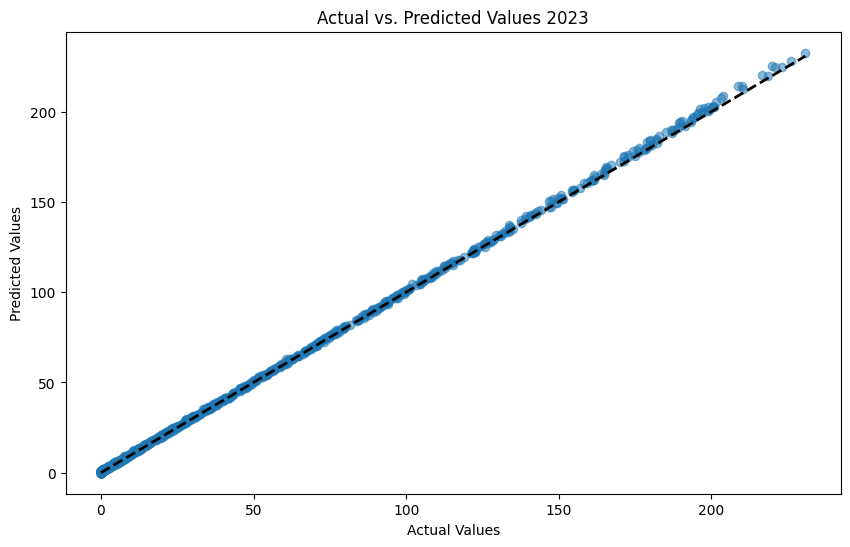

In [24]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_S_23, y_pred_S_23, alpha=0.5)
plt.plot([y_test_S_23.min(), y_test_S_23.max()], [y_test_S_23.min(), y_test_S_23.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values 2023')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [25]:
# Shape
y_test_S_23.shape

(2628,)

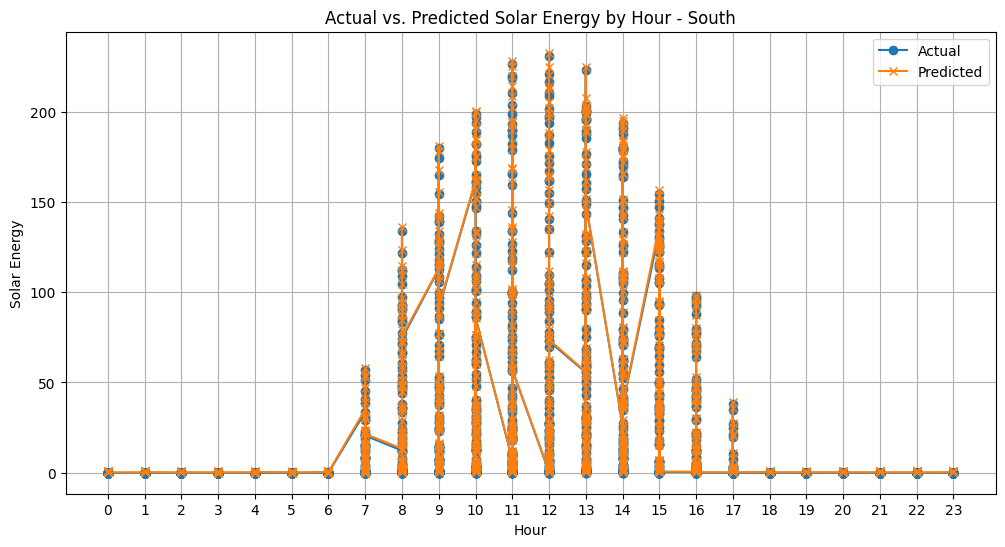

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Energy vs Hour Plot with South

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_S_23['Hour'], 'Actual': y_test_S_23.values, 'Predicted': y_pred_S_23.flatten()})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Hour - South')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()

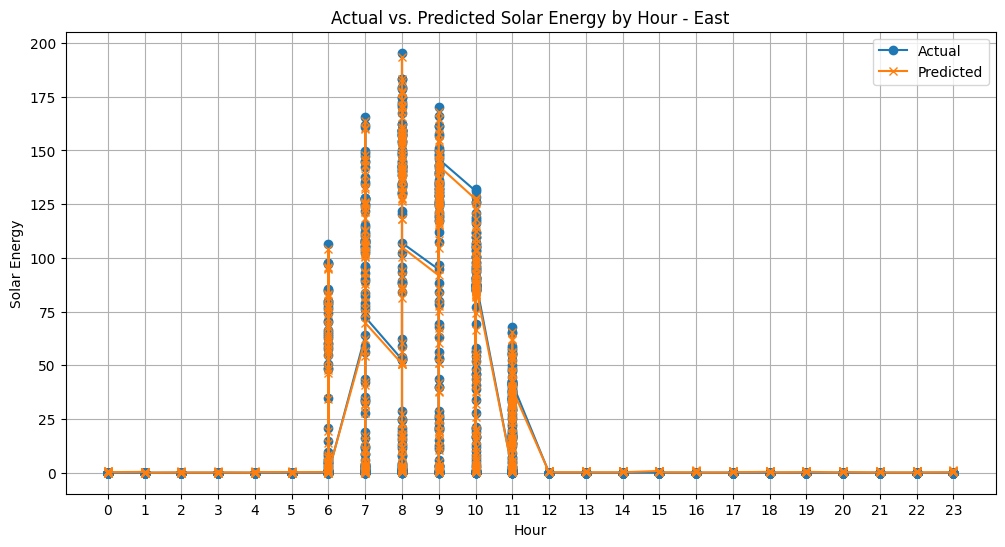

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Energy vs Hour Plot with East

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_E_23['Hour'], 'Actual': y_test_E_23.values, 'Predicted': y_pred_E_23.flatten()})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot the actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Hour - East')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()

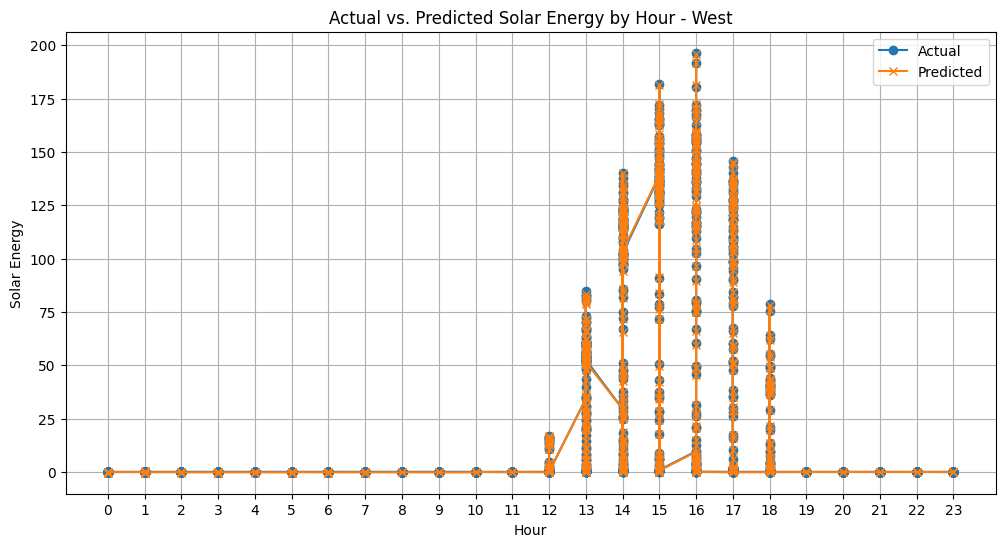

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Energy vs Hour Plot with West

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_W_23['Hour'], 'Actual': y_test_W_23.values, 'Predicted': y_pred_W_23.flatten()})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Hour - West')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()